In [1]:
# Suport Vector Machine SVM

C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[[370   9]
 [ 46  23]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       379
           1       0.72      0.33      0.46        69

    accuracy                           0.88       448
   macro avg       0.80      0.65      0.69       448
weighted avg       0.86      0.88      0.86       448



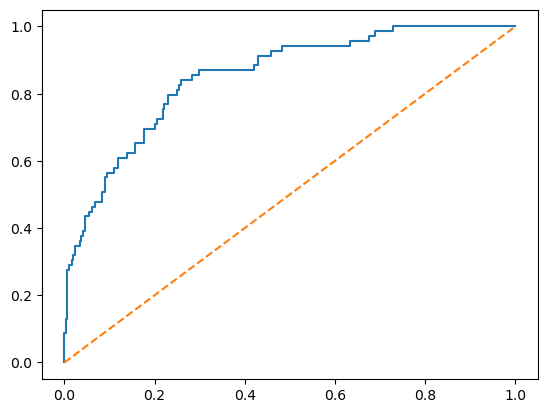

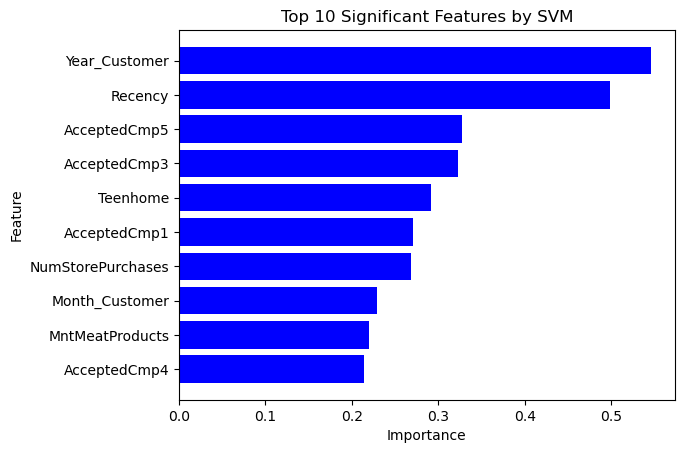

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load data
data = pd.read_excel('marketing_campaign1.xlsx')

# Data Cleansing
data['Income'].fillna(data['Income'].median(), inplace=True)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(data[['Education', 'Marital_Status']])
encoded_col_names = encoder.get_feature_names_out(['Education', 'Marital_Status'])
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_col_names)
data = data.join(encoded_df)
data.drop(['Education', 'Marital_Status'], axis=1, inplace=True)

# Handle DateTime
data['Year_Customer'] = data['Dt_Customer'].dt.year
data['Month_Customer'] = data['Dt_Customer'].dt.month
data['Day_Customer'] = data['Dt_Customer'].dt.day
data.drop('Dt_Customer', axis=1, inplace=True)

# Standardize features
X = data.drop('Response', axis=1)
y = data['Response']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True)  # Using linear kernel for feature importance
svm_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Feature Importance from coefficients (only for linear kernel)
coefficients = svm_model.coef_[0]
features = X.columns
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': np.abs(coefficients)})
significant_features = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display results and visualization
print(conf_matrix)
print(class_report)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Visualize the top significant features
plt.figure()
top_features = significant_features.head(10)
plt.barh(top_features['Feature'], top_features['Coefficient'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Significant Features by SVM')
plt.gca().invert_yaxis()
plt.show()
